1


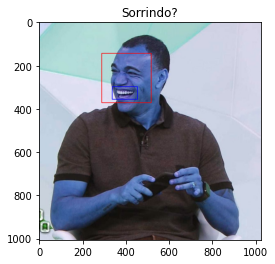

In [37]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Le xml de treinamento
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml') 
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml') 

#importa imagem
img = cv.imread('img.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#detecta todas as faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5) 

#Passa por todas as faces encontradas
for (x, y, w, h) in faces: 
  #Cria um retangulo ao redor de cada face
	cv.rectangle(img, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) 
	roi_gray = gray[y:y + h, x:x + w] 
	roi_color = img[y:y + h, x:x + w] 
  #detecta todos os smiles da tela
	smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20) 
  #Percorre todos os smiles encontrados
	for (sx, sy, sw, sh) in smiles: 
    #Cria um retangulo ao redor de cada smile
		cv.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 

print (len(faces))
plt.imshow(img, 'gray')
plt.title('Sorrindo?')
plt.show()